In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [30]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , Dropout , MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [31]:
(X_train , y_train ) , (X_test , y_test)=keras.datasets.mnist.load_data()

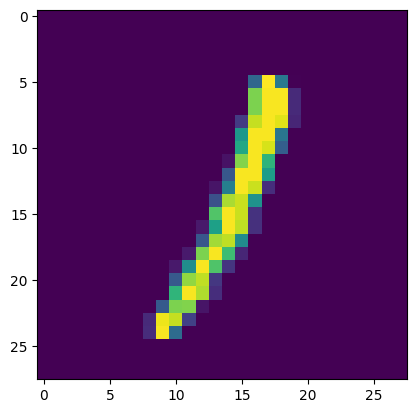

In [32]:
for i in range(100):
    plt.imshow(X_train[i])
    plt.show

In [33]:
X_train=X_train/255
X_test=X_test/255

In [34]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128 , activation='relu'))
model.add(Dense(10 , activation='softmax'))

c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [37]:
model.fit(X_train, y_train, epochs=10 , validation_split=0.2 , verbose=True)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.2891 - val_loss: 0.1673
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1272 - val_loss: 0.1243
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0871 - val_loss: 0.1016
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0648 - val_loss: 0.0908
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0492 - val_loss: 0.0877
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0393 - val_loss: 0.0924
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0299 - val_loss: 0.0881
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0246 - val_loss: 0.0922
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0199 - val_loss: 0.0889
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0162 - val_loss: 0.0982


In [38]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [39]:
y_pred=y_prob.argmax(axis=1)


In [40]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
ann= Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128 , activation='relu'),
    Dense(64 , activation='relu'),
    Dense(10 , activation='softmax')

])

In [43]:
ann.compile(optimizer='adam' , loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history_ann = ann.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2, validation_data=(X_test, y_test_cat), verbose=True)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9287 - loss: 0.2430 - val_accuracy: 0.9613 - val_loss: 0.1257
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9689 - loss: 0.1025 - val_accuracy: 0.9719 - val_loss: 0.0893
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9788 - loss: 0.0692 - val_accuracy: 0.9734 - val_loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9829 - loss: 0.0531 - val_accuracy: 0.9755 - val_loss: 0.0816
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9861 - loss: 0.0421 - val_accuracy: 0.9761 - val_loss: 0.0842


In [46]:
# Reshape data for CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Build CNN model
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_cnn = cnn.fit(X_train_cnn, y_train_cat, epochs=5, batch_size=32, validation_split=0.2, validation_data=(X_test, y_test_cat), verbose=True)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step - accuracy: 0.9345 - loss: 0.2157 - val_accuracy: 0.9841 - val_loss: 0.0481
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9766 - loss: 0.0808 - val_accuracy: 0.9866 - val_loss: 0.0383
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9822 - loss: 0.0584 - val_accuracy: 0.9893 - val_loss: 0.0300
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9859 - loss: 0.0466 - val_accuracy: 0.9897 - val_loss: 0.0281
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9877 - loss: 0.0393 - val_accuracy: 0.9910 - val_loss: 0.0261


In [50]:
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [52]:
acc_cnn=cnn.evaluate(X_test_cnn , y_test_cat , verbose=0)[1]
acc_cnn

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [53]:
print('X_test_cnn shape:', X_test_cnn.shape)
print('y_test_cat shape:', y_test_cat.shape)

X_test_cnn shape: (10000, 28, 28, 1)
y_test_cat shape: (10000, 10)
